In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
import sys
sys.path.append("..")
from source.utils import creat_rollingData2, var_df, split
from source.graphs import graph_df

In [2]:
%store -r X
%store -r Y
%store -r df

In [3]:
# Checking initial rows of X
X.head(3)

,833.647,833.915,834.183,834.451,834.720,834.989,835.258,835.527,835.796,836.066,...,2478.624,2480.996,2483.372,2485.753,2488.138,2490.529,2492.924,2495.323,2497.727,2500.136
0,-0.648335,-0.647982,-0.648163,-0.648576,-0.647054,-0.646185,-0.648029,-0.647906,-0.644328,-0.641267,...,1.613964,1.574400,1.561951,1.571639,1.592554,1.605786,1.566209,1.515389,1.559272,1.593563
1,-0.822145,-0.823120,-0.824706,-0.825808,-0.824908,-0.823157,-0.822439,-0.821861,-0.821153,-0.821445,...,0.334517,0.310941,0.305476,0.307412,0.308926,0.304224,0.295134,0.298762,0.310149,0.276883
2,-0.828548,-0.831003,-0.832069,-0.833250,-0.832204,-0.829206,-0.828115,-0.827378,-0.825094,-0.824156,...,0.426376,0.432715,0.418309,0.393695,0.391467,0.408376,0.433706,0.482562,0.504463,0.476967


In [4]:
# Dummy DataFrame to demonstrate rolling window
df_dummy = pd.DataFrame({
    'A': [0, 1, 2, 3, 4], 
    'B': [0, 10, 20, 30, 40], 
    'C': [0, 100, 200, 300, 400], 
    'D': [0, 1, 2, 3, 4],  
    'E': [0, 1, 2, 3, 4],  
    'F': [0, 1, 2, 3, 4]
})
df_dummy


,A,B,C,D,E,F
0,0,0,0,0,0,0
1,1,10,100,1,1,1
2,2,20,200,2,2,2
3,3,30,300,3,3,3
4,4,40,400,4,4,4


In [5]:
# Rolling window sum example for dummy data
df_dummyRoll = df_dummy.T.rolling(3).sum().T
print(df_dummyRoll)


    A   B      C      D      E     F
0 NaN NaN    0.0    0.0    0.0   0.0
1 NaN NaN  111.0  111.0  102.0   3.0
2 NaN NaN  222.0  222.0  204.0   6.0
3 NaN NaN  333.0  333.0  306.0   9.0
4 NaN NaN  444.0  444.0  408.0  12.0


In [6]:
# Selecting every third column after rolling
df_dummyRoll = df_dummyRoll.iloc[:, 2::3]
print(df_dummyRoll)


       C     F
0    0.0   0.0
1  111.0   3.0
2  222.0   6.0
3  333.0   9.0
4  444.0  12.0


In [7]:
# Generating rolling windows for dummy data
df_arrayRol_dummy = creat_rollingData2(df=df_dummy, window_arr=[2, 3], method=var_df)
print(df_arrayRol_dummy)


[       B        D    F
0    0.0      0.0  0.0
1   40.5   4900.5  0.0
2  162.0  19602.0  0.0
3  364.5  44104.5  0.0
4  648.0  78408.0  0.0,          C    F
0      0.0  0.0
1   2997.0  0.0
2  11988.0  0.0
3  26973.0  0.0
4  47952.0  0.0]


c:\Users\joshu\OneDrive\Desktop\ApplesML\tutorial_3\..\source\utils.py:30: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  df_tmp =  method(df_tmp.rolling(w, axis = ax))  # Calculate variance
c:\Users\joshu\OneDrive\Desktop\ApplesML\tutorial_3\..\source\utils.py:30: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  df_tmp =  method(df_tmp.rolling(w, axis = ax))  # Calculate variance


In [8]:
# Rolling windows for actual dataset X
X_arrayRol = creat_rollingData2(df=X, window_arr=[10, 30, 50, 100], method=var_df)


c:\Users\joshu\OneDrive\Desktop\ApplesML\tutorial_3\..\source\utils.py:30: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  df_tmp =  method(df_tmp.rolling(w, axis = ax))  # Calculate variance
c:\Users\joshu\OneDrive\Desktop\ApplesML\tutorial_3\..\source\utils.py:30: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  df_tmp =  method(df_tmp.rolling(w, axis = ax))  # Calculate variance
c:\Users\joshu\OneDrive\Desktop\ApplesML\tutorial_3\..\source\utils.py:30: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  df_tmp =  method(df_tmp.rolling(w, axis = ax))  # Calculate variance
c:\Users\joshu\OneDrive\Desktop\ApplesML\tutorial_3\..\source\utils.py:30: FutureWarning: Support for axis=1 in DataFrame.rolling is deprec

In [9]:
# Display shapes
for x in X_arrayRol:
    print(x.shape)


(562, 207)
(562, 69)
(562, 41)
(562, 20)


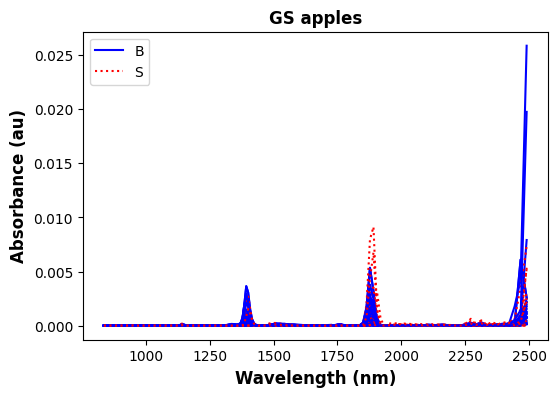

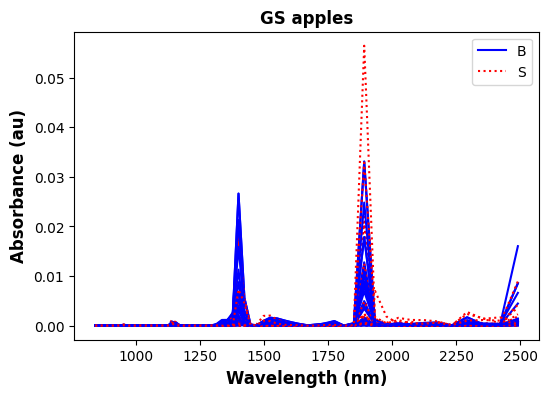

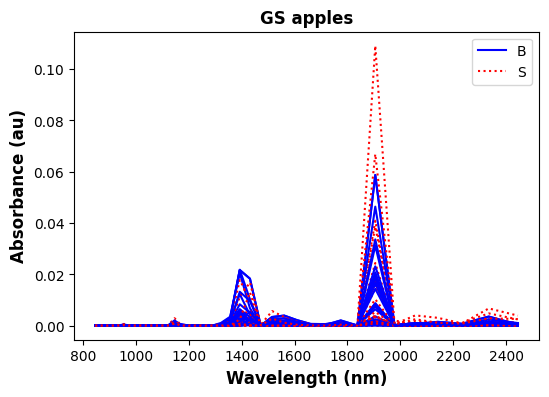

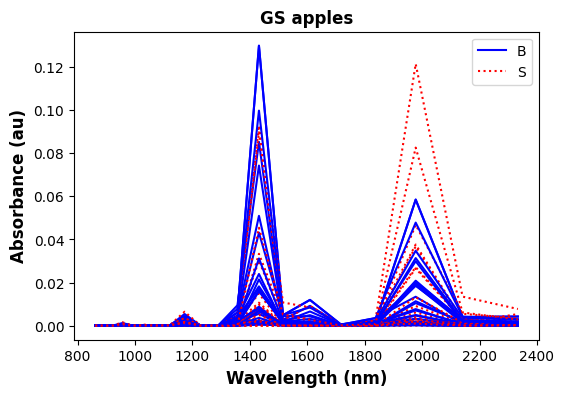

In [10]:
# Visualization
graph_df(X_arrayRol, Y, n=50)


In [11]:
# Encode target labels
Y = Y.map({'S': 1, 'B': 0})


In [12]:
# Initialize selected_indexes before the loop
selected_indexes = []

# Initialize the model (e.g., RandomForestClassifier)
model = RandomForestClassifier(random_state=42)

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


In [13]:
# --- Updated Model Training and Evaluation Loop ---
for i, x_roll in enumerate(X_arrayRol):
    Xtrain, Xtest, Ytrain, Ytest = split(x_roll, Y)
    print(f"\n📊 Rolling window set {i+1}: (samples, features) = {Xtrain.shape}")

    # Handle missing values
    imputer = SimpleImputer(strategy='mean')
    Xtrain_imputed = imputer.fit_transform(Xtrain)
    Xtest_imputed = imputer.transform(Xtest)

    # --- Inspect Number of Features Before Selection ---
    print(f"Number of features before selection: {Xtrain_imputed.shape[1]}")

    # Feature selection
    selector = SelectFromModel(model, threshold='median')
    selector.fit(Xtrain_imputed, Ytrain)
    selected_features_mask = selector.get_support()

    # --- Inspect Number of Selected Features ---
    print(f"Number of features selected: {np.sum(selected_features_mask)}")
    if np.sum(selected_features_mask) == 0:
        print("⚠️ Warning: No features selected. Skipping hyperparameter tuning.")
        precision = 0.0
        selected_indexes.append(selected_features_mask)
        continue

    # Hyperparameter tuning
    random_search = RandomizedSearchCV(
        model,
        param_distributions=param_grid,
        n_iter=10,
        scoring='precision',
        cv=3,
        n_jobs=-1,
        random_state=42,
        error_score='raise'  # --- ADDED FOR DEBUGGING ---
    )
    try:
        random_search.fit(Xtrain_imputed[:, selected_features_mask], Ytrain)
        best_model = random_search.best_estimator_

        # Prediction
        y_pred = best_model.predict(Xtest_imputed[:, selected_features_mask])

        # Precision score
        if len(np.unique(y_pred)) < 2:
            print(f"⚠️ Warning: Only one class predicted in rolled data {i+1}. Precision = 0.0")
            precision = 0.0
        else:
            precision = precision_score(Ytest, y_pred, zero_division=0)
            print(f"✅ Precision on test set (rolled data {i+1}): {precision:.4f}")

        selected_indexes.append(selected_features_mask)

    except Exception as e:
        print(f"❌ Error during RandomizedSearchCV for rolled data {i+1}: {e}")
        precision = 0.0
        selected_indexes.append(np.zeros(Xtrain_imputed.shape[1], dtype=bool))  # Append a mask of all False



📊 Rolling window set 1: (samples, features) = (393, 207)
Number of features before selection: 207
Number of features selected: 104
✅ Precision on test set (rolled data 1): 0.5647

📊 Rolling window set 2: (samples, features) = (393, 69)
Number of features before selection: 69
Number of features selected: 35
✅ Precision on test set (rolled data 2): 0.6835

📊 Rolling window set 3: (samples, features) = (393, 41)
Number of features before selection: 41
Number of features selected: 21
✅ Precision on test set (rolled data 3): 0.6047

📊 Rolling window set 4: (samples, features) = (393, 20)
Number of features before selection: 20
Number of features selected: 10
✅ Precision on test set (rolled data 4): 0.6404


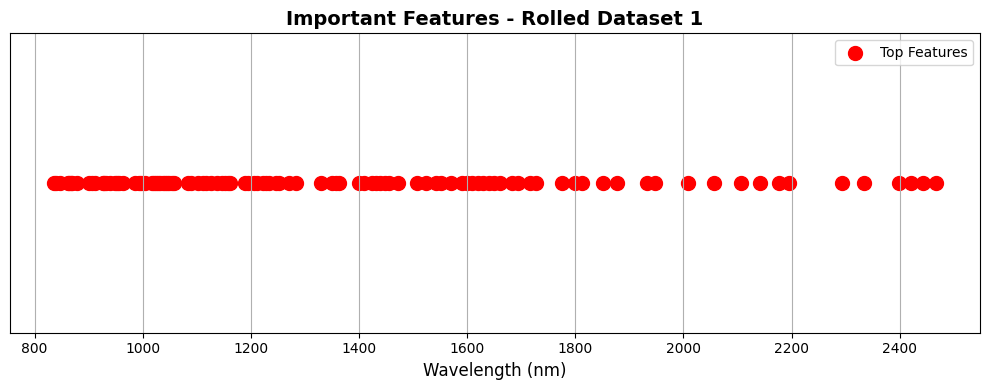

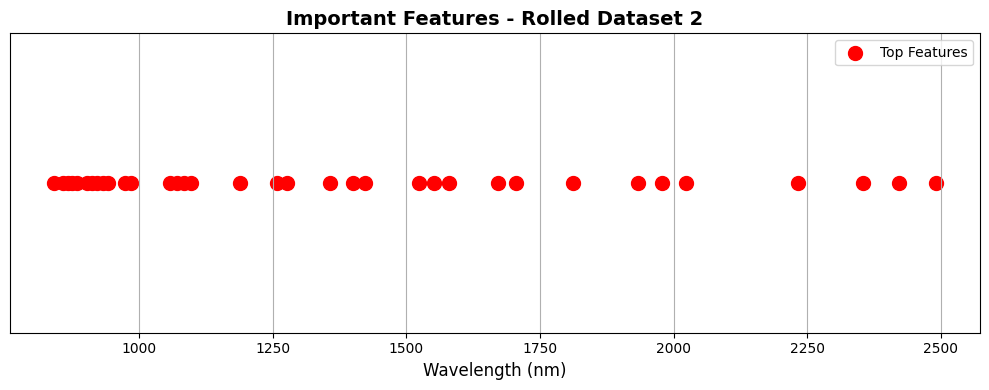

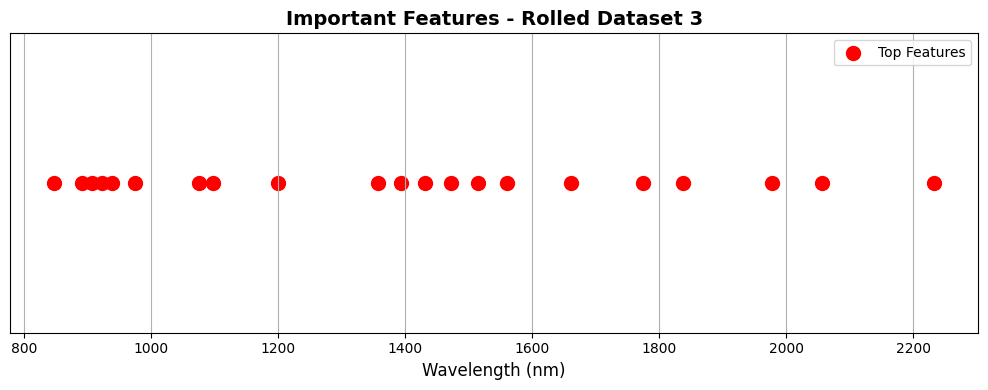

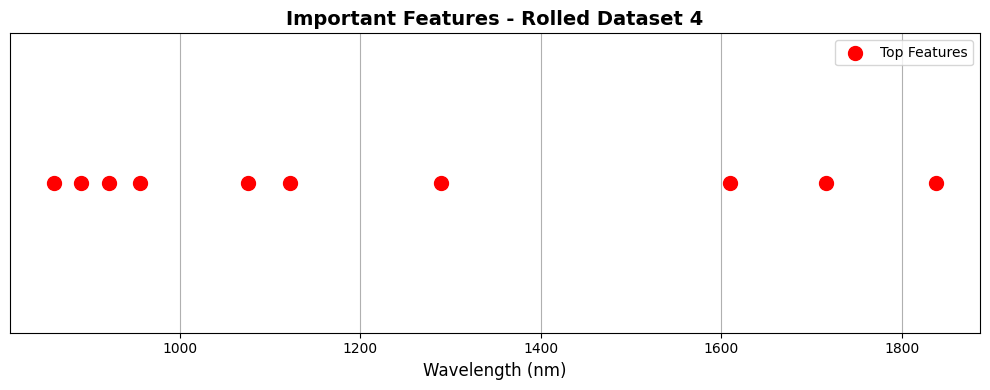

In [ ]:
# Visualization of selected features
original_wavelengths = X.columns.astype(float)

# Update the code for visualization:
for i, (rolled_df, support_mask) in enumerate(zip(X_arrayRol, selected_indexes)):
    if np.sum(support_mask) > 0:  # Ensure there are selected features
        selected_features = rolled_df.columns[support_mask].astype(float)
        plt.figure(figsize=(10, 4))
        plt.scatter(selected_features, np.ones_like(selected_features), color='red', label='Top Features', s=100)
        plt.title(f"Important Features - Rolled Dataset {i+1}", fontsize=14, fontweight='bold')
        plt.xlabel("Wavelength (nm)", fontsize=12)
        plt.yticks([])  
        plt.grid(True, axis='x')
        plt.legend()
        plt.tight_layout()
        plt.show()


In [15]:
# Store outputs
%store X_arrayRol
%store selected_indexes


Stored 'X_arrayRol' (list)
Stored 'selected_indexes' (list)
